In [2]:
import pathlib
from burr.core import State, action, ApplicationBuilder
from burr.core import when


In [3]:
# define the state
dev_inputs = {
    'pdf_path' : 'path',
}
dev_state = {
    'pdf_path' : 'path',
}

In [9]:
@action(reads=[], writes=["config"])
def converter_configure(state: State, config_path: str) -> State:
    return state

@action(reads=["config"], writes=["document_id", "conversion_result"])
def converter_run(state: State, document_id: str, db_connection) -> State:
    # load filepath from db

    # setup pipeline

    # convert document

    # deal with errors
    return state

@action(reads=["conversion_result"], writes=["conversion_status"])
def converter_handle(state: State) -> State:
    """Handle conversion errors and status"""

    # Check conversion status

    # update state decision variable
    return state

@action(reads=["document_id", "conversion_status"], writes=[])
def converter_fail(state: State, db_connection) -> State:
    """Handle conversion failure"""
    # Update DB with info/status

    # Trigger notifications as needed
    
    return state

@action(reads=["conversion_result"], writes=["extraction_content","extraction_status"])
def extraction_run(state: State) -> State:
    """Extract parts from the docling conversion"""
    # Extract all parts    

    # update status as needed
    return state

@action(reads=["document_id","extraction_content"], writes=["extraction_status"])
def extraction_store(state: State, db_connection) -> State:
    """Store all items in db"""
    # Store in DB

    # log any errors
    
    return state
    

@action(reads=["extraction_content","extraction_status"], writes=["extraction_status"])
def extraction_handle(state: State) -> State:
    """Handle extraction errors and status"""
    # Check extraction status

    # update state decision variable
    return state

@action(reads=["document_id","extraction_status"], writes=[])
def extraction_fail(state: State, db_connection) -> State:
    """Handle extraction failure"""
    # Update DB with info/status

    # Trigger notifications as needed
    return state

@action(reads=["document_id","extraction_status"], writes=[])
def extraction_success(state: State) -> State:
    """Handle extraction success"""
    # Update DB with info/status

    # Trigger notifications as needed
    return state
    

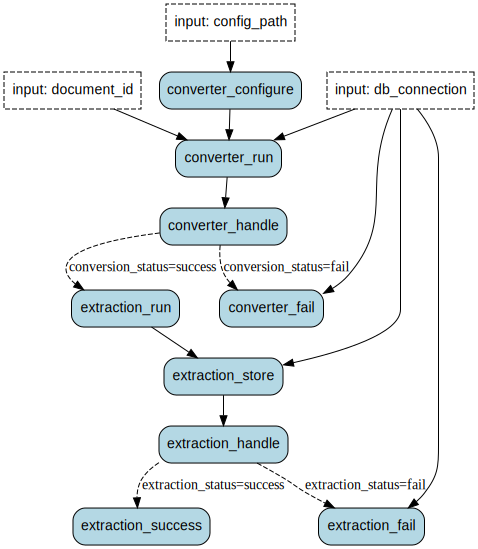

In [10]:
# Build and visualize graph/logic
(
    ApplicationBuilder()
    .with_actions(
        converter_configure=converter_configure, 
        converter_run=converter_run, 
        converter_handle=converter_handle, 
        converter_fail=converter_fail,
        extraction_run=extraction_run,
        extraction_store=extraction_store,
        extraction_handle=extraction_handle,
        extraction_fail=extraction_fail,
        extraction_success=extraction_success
    )
    .with_transitions(
        ("converter_configure", "converter_run"),
        ("converter_run", "converter_handle"),
        ("converter_handle", "converter_fail", when(conversion_status='fail')),
        ("converter_handle", "extraction_run", when(conversion_status='success')),
        ("extraction_run", "extraction_store"),
        ("extraction_store", "extraction_handle"),
        ("extraction_handle", "extraction_fail", when(extraction_status='fail')),
        ("extraction_handle", "extraction_success", when(extraction_status='success')),
        
    )
    .with_entrypoint("converter_configure")
    .build()
)